# Gaussian Process Regression training 

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Make test data

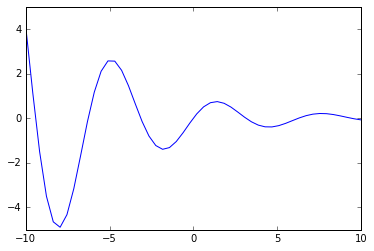

In [2]:
n=50
param = 2
x_test = np.linspace(-10, 10, n).reshape(-1,1)
y_test = np.sin(x_test).reshape(-1,1) * np.exp(-x_test/5).reshape(-1,1)
plt.plot(x_test,y_test)

### Define a kernel function 

In [3]:
def kernel(a,b,param):
    dist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a,b.T)
    return np.exp(-0.5 / param * dist)

### Calculate kernel of data

In [4]:
K_ss = kernel(x_test, x_test, param)
print(K_ss)

[[1.00000000e+00 9.59206103e-01 8.46540486e-01 ... 1.10525024e-40
  2.11394791e-42 3.72007598e-44]
 [9.59206103e-01 1.00000000e+00 9.59206103e-01 ... 5.31680613e-39
  1.10525024e-40 2.11394791e-42]
 [8.46540486e-01 9.59206103e-01 1.00000000e+00 ... 2.35323281e-37
  5.31680613e-39 1.10525024e-40]
 ...
 [1.10525024e-40 5.31680613e-39 2.35323281e-37 ... 1.00000000e+00
  9.59206103e-01 8.46540486e-01]
 [2.11394791e-42 1.10525024e-40 5.31680613e-39 ... 9.59206103e-01
  1.00000000e+00 9.59206103e-01]
 [3.72007598e-44 2.11394791e-42 1.10525024e-40 ... 8.46540486e-01
  9.59206103e-01 1.00000000e+00]]


### Cholesky decomposition

In [5]:
L = np.linalg.cholesky(K_ss + 1e-11*np.eye(n))

### Sample from standard normal

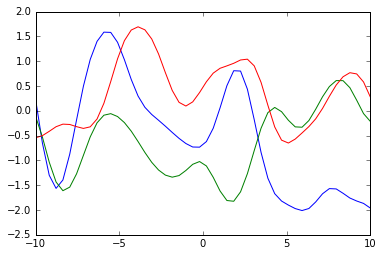

In [6]:
f_prior = np.dot(L, np.random.normal(size=(n,3)))
plt.plot(x_test, f_prior)

### Generate train data

In [7]:
#x_train = np.array([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 6, 8, 10]).reshape(-1,1)
x_train = np.array([-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]).reshape(-1,1)
y_train = np.sin(x_train)* np.exp(-x_train/5)
print(y_train)

[[ 4.01980251]
 [-4.90032347]
 [ 0.92769212]
 [ 1.68429493]
 [-1.35651236]
 [ 0.        ]
 [ 0.60952029]
 [-0.34005328]
 [-0.08415833]
 [ 0.19974799]
 [-0.07362525]]


### Calculate kernel and apply cholesky

In [8]:
K = kernel(x_train, x_train, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(x_train)))

### Compute mean at test points

In [9]:
K_s = kernel(x_train, x_test, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, y_train)).reshape((n,))
print(mu)

[ 4.01944064  2.34857146  0.12729276 -2.17132885 -4.00575122 -4.94635715
 -4.81906568 -3.75057349 -2.10083141 -0.32097735  1.19570875  2.20973718
  2.65386493  2.59033119  2.14608037  1.46185823  0.66961417 -0.10989312
 -0.76710077 -1.21320195 -1.39764535 -1.32202685 -1.03916528 -0.63515283
 -0.20246498  0.18339976  0.47499223  0.65121227  0.70918027  0.65733222
  0.51343118  0.3056869   0.07226872 -0.14413844 -0.30600342 -0.39057338
 -0.39467492 -0.33256622 -0.22851597 -0.10820197  0.00725749  0.103201
  0.17044172  0.20379398  0.20180187  0.16764088  0.10981317  0.04119266
 -0.02391108 -0.07361678]


### Samples from posterior

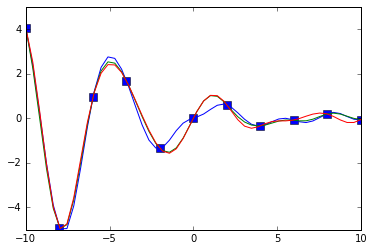

In [10]:
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))
plt.plot(x_train, y_train, 'bs', ms=8)
plt.plot(x_test, f_post)